In [39]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
bank=pd.read_csv("C:/Users/Yogendra/Downloads/bank-full1.csv")

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.shape

(45211, 17)

In [45]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [46]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [47]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [48]:
bank['y'] = bank['y'].map({'no': 0, 'yes': 1})

In [50]:
bank.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [51]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [54]:
x = bank.drop(['y'], axis=1)
y = bank['y']

In [55]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [56]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [57]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 81.8/81.8 kB 650.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [58]:
import category_encoders as ce

In [59]:
encoder=ce.OneHotEncoder(cols=['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [60]:
x = encoder.fit_transform(x)

In [61]:
x.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,month_12,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
0,58,1,0,0,0,0,0,0,0,0,...,0,0,261,1,-1,0,1,0,0,0
1,44,0,1,0,0,0,0,0,0,0,...,0,0,151,1,-1,0,1,0,0,0
2,33,0,0,1,0,0,0,0,0,0,...,0,0,76,1,-1,0,1,0,0,0
3,47,0,0,0,1,0,0,0,0,0,...,0,0,92,1,-1,0,1,0,0,0
4,33,0,0,0,0,1,0,0,0,0,...,0,0,198,1,-1,0,1,0,0,0


In [62]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x)

In [64]:
x_train

array([[ 1.26666667,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33333333,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.2       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.2       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13333333,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [65]:
cols = x.columns
x_train = pd.DataFrame(x_train, columns=[cols])

In [66]:
x_train.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,month_12,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
0,1.266667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.375000,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.134259,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.481481,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,0.533333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.407407,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.083333,-0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
classifier = LogisticRegression()
classifier.fit(x_train,y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred=classifier.predict(x_train)

In [70]:
y_pred_df=pd.DataFrame({'actual':y,'predicted':y_pred})

In [71]:
y_pred_df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [72]:
y_pred_df.actual.value_counts()

0    39922
1     5289
Name: actual, dtype: int64

In [73]:
y_pred_df.predicted.value_counts()

0    42608
1     2603
Name: predicted, dtype: int64

In [75]:
correctness=y_pred_df['actual']==y_pred_df['predicted']
correctness

0         True
1         True
2         True
3         True
4         True
         ...  
45206     True
45207    False
45208     True
45209     True
45210     True
Length: 45211, dtype: bool

In [76]:
acc=correctness.mean()*100
print('\n accuracy of model = ', acc)


 accuracy of model =  90.0997544845281


In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[39027   895]
 [ 3581  1708]]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.66      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.65      0.69     45211
weighted avg       0.89      0.90      0.89     45211



<Axes: >

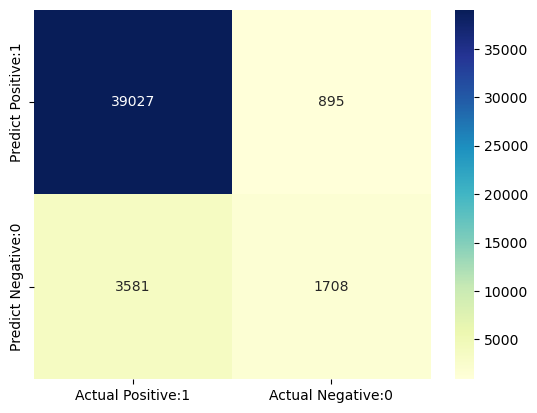

In [80]:
cm_matrix = pd.DataFrame(data=confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y ,test_size=0.25 )

In [82]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
predicted_y=classifier.predict(x_test)

In [84]:
accuracy_train = np.mean(y_test==predicted_y)
accuracy_train

0.8911793329204636

In [85]:
predict_y_train=classifier.predict(x_train)

In [86]:
accuracy_train_m = np.mean(y_train==predict_y_train)
accuracy_train_m

0.8914415477173528

In [87]:
#both accuracies are almost equal hence the model learnt on training dataset nice.